In [ ]:
# set up our local code path
import sys
sys.path.append('/home/serenity/dev/shadows/serenity/serenity-mdrecorder/src')

# standard imports
import pandas as pd
import plotly.graph_objects as go

from cloudwall.serenity.mdrecorder.tickstore import LocalTickstore
from datetime import datetime as dt
from pathlib import Path
from plotly.subplots import make_subplots

# set up Cufflinks
import cufflinks as cf
cf.set_config_file(theme='ggplot',sharing='public',offline=True)

In [ ]:
# Connect to Behemoth
phemex_tickstore = LocalTickstore(Path('/behemoth/db/PHEMEX_TRADES'), 'time')


In [ ]:
phemex_trades = tickstore.select('BTCUSD', start=dt(2020, 4, 1), end=dt(2020, 12, 31))

In [ ]:
del phemex_trades['product_id']
del phemex_trades['sequence']
del phemex_trades['side']
phemex_trades['price'] = phemex_trades['price'] / 10000
phemex_trades.head()

In [ ]:
cbp_tickstore = LocalTickstore(Path('/behemoth/db/COINBASE_PRO_TRADES'), 'time')
cbp_trades = cbp_tickstore.select('BTC-USD', start=dt(2020, 4, 1), end=dt(2020, 12, 31))

In [51]:
binance_tickstore = LocalTickstore(Path('/behemoth/db/BINANCE_TRADES'), 'time')
binance_trades = binance_tickstore.select('BTC-USDT', start=dt(2020, 4, 1), end=dt(2020, 12, 31))

In [52]:
cbp_5m = cbp_trades['price'].resample('5Min').ohlc()

In [53]:
binance_5m = binance_trades['price'].resample('5Min').ohlc()

In [54]:
phemex_5m = phemex_trades['price'].resample('5Min').ohlc()

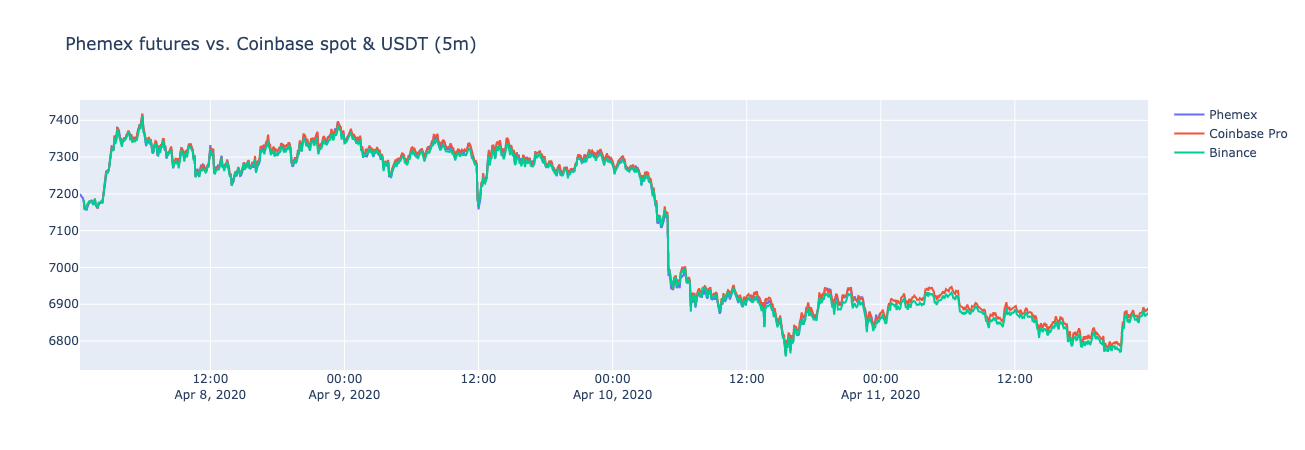

In [55]:
fig = go.Figure()

# Add traces
fig.add_trace(
    go.Scatter(x=phemex_5m.index, y=phemex_5m['close'], name="Phemex")
)


fig.add_trace(
    go.Scatter(x=cbp_5m.index, y=cbp_5m['close'], name="Coinbase Pro")
)

fig.add_trace(
    go.Scatter(x=binance_5m.index, y=binance_5m['close'], name="Binance")
)

# Add figure title
fig.update_layout(
    title_text="Phemex futures vs. Coinbase spot & USDT (5m)"
)

fig.show()